<a href="https://colab.research.google.com/github/RaportRekai/Kidney_Stone_Detection/blob/main/BPNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import numpy as np
from random import randint

In [ ]:
model = Sequential([
    Dense(units = 16,input_shape = (4,), activation = 'relu'),
    Dense(units = 40, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 40)                680       
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import pandas as pd
df = pd.read_csv("/content/M2.csv")
df

,Contrast,Correlation,Energy,Homogeneity,Result
0,0.146052,0.950047,0.678474,0.963549,1
1,0.151541,0.947862,0.681694,0.962777,1
2,0.131398,0.958688,0.514790,0.952936,1
3,0.131972,0.959382,0.515738,0.952692,1
4,0.132247,0.960214,0.516277,0.952706,1
...,...,...,...,...,...
4113,0.158994,0.967457,0.509410,0.960167,0
4114,0.156678,0.967571,0.510278,0.960536,0
4115,0.154522,0.967655,0.510964,0.961028,0
4116,0.152435,0.967703,0.511975,0.961679,0


In [ ]:
without_result_column = df.drop(['Result'], axis=1)
without_result_column
x_train = np.array(without_result_column)
y_out = df['Result']
y_train = np.array(y_out)
y_train = y_train.reshape(4118,1)
y_train

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001),loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics = 'accuracy')

In [ ]:
model.fit(x = x_train, y = y_train, validation_split = 0.1,batch_size = 10,epochs = 40,shuffle  =True,verbose  =2)

Epoch 1/40
371/371 - 1s - loss: 0.3694 - accuracy: 0.8206 - val_loss: 0.3121 - val_accuracy: 0.8956 - 1s/epoch - 3ms/step
Epoch 2/40
371/371 - 1s - loss: 0.3685 - accuracy: 0.8276 - val_loss: 0.4524 - val_accuracy: 0.7573 - 1s/epoch - 3ms/step
Epoch 3/40
371/371 - 2s - loss: 0.3737 - accuracy: 0.8268 - val_loss: 0.1728 - val_accuracy: 1.0000 - 2s/epoch - 4ms/step
Epoch 4/40
371/371 - 1s - loss: 0.3643 - accuracy: 0.8292 - val_loss: 0.2533 - val_accuracy: 0.9466 - 1s/epoch - 3ms/step
Epoch 5/40
371/371 - 1s - loss: 0.3642 - accuracy: 0.8316 - val_loss: 0.2098 - val_accuracy: 0.9757 - 1s/epoch - 3ms/step
Epoch 6/40
371/371 - 1s - loss: 0.3604 - accuracy: 0.8257 - val_loss: 0.2469 - val_accuracy: 0.9417 - 1s/epoch - 3ms/step
Epoch 7/40
371/371 - 1s - loss: 0.3633 - accuracy: 0.8287 - val_loss: 0.2689 - val_accuracy: 0.9175 - 1s/epoch - 3ms/step
Epoch 8/40
371/371 - 1s - loss: 0.3601 - accuracy: 0.8311 - val_loss: 0.3289 - val_accuracy: 0.8738 - 1s/epoch - 3ms/step
Epoch 9/40
371/371 - 1s 

In [ ]:
#0.146052 	0.950047 	0.678474 	0.963549 = 1
#0.158994 	0.967457 	0.509410 	0.960167 = 0
# 0.131398,	0.958688,	0.514790,	0.952936 = 1,
# 0.154522,	0.967655,	0.510964,	0.961028 = 0
# 0.131972,	0.959382,	0.515738,	0.952692 = 1
inpt = [[0.146052, 	0.950047, 	0.678474, 	0.963549],[0.158994, 	0.967457, 	0.509410, 	0.960167],[0.131398,	0.958688,	0.514790,	0.952936],[0.154522,	0.967655,	0.510964,	0.961028	],[	0.131972,	0.959382,	0.515738,	0.952692]]

In [ ]:
ori = [1,0,1,0,1]
ar = []
arr = model.predict(x = inpt, batch_size = 10,verbose = 0)
arr
for i in arr:
    if i <0.4:
        print("No Stone detected")
        ar.append(0)
    else:
        print("Stone detected")
        ar.append(1)
ar

Stone detected
No Stone detected
Stone detected
No Stone detected
Stone detected


[1, 0, 1, 0, 1]

<Axes: xlabel='Predicted', ylabel='Actual'>

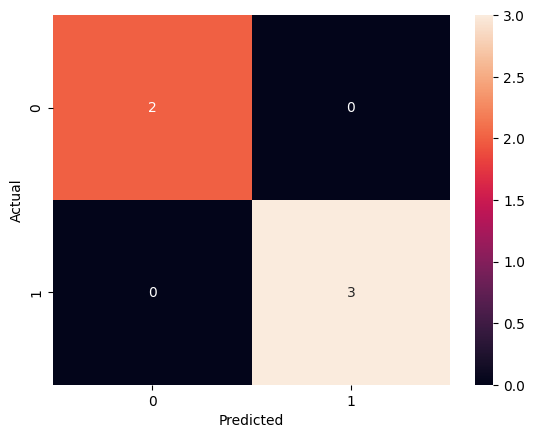

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm_nn = pd.crosstab(ori, ar, rownames={"Actual"}, colnames={"Predicted"})
sns.heatmap(cm_nn, annot=True, fmt='d')